<a href="https://colab.research.google.com/github/itzrnvr/opencv-labs/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torchvision
import torchvision.transforms as transforms
from skimage import filters, feature
from skimage.io import imread
from skimage.transform import resize
from torch.utils.data import DataLoader
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [6]:
IMG_MICROSCOPE = "images.jpeg"
IMG_SATELLITE = "sat.jpeg"
TORCHVISION_MNIST_DIR = "./data"

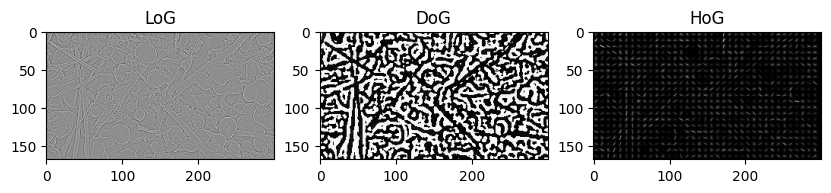

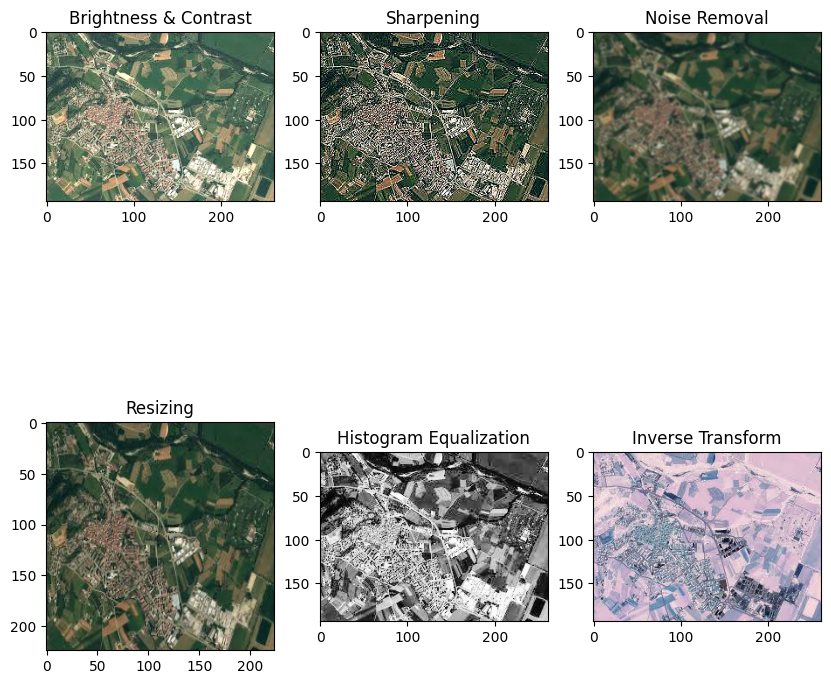

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.61MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.10MB/s]

Setup Complete. Ready for training and further analysis.


In [7]:
imgA = cv2.imread(IMG_MICROSCOPE, 0)
imgB = cv2.imread(IMG_SATELLITE)
log_output = filters.laplace(imgA)
plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.imshow(log_output, cmap='gray')
plt.title('LoG')
dog_out = cv2.GaussianBlur(imgA, (9,9), 2) - cv2.GaussianBlur(imgA, (9,9), 5)
plt.subplot(1,3,2)
plt.imshow(dog_out, cmap='gray')
plt.title('DoG')
hog_feat, hog_img = feature.hog(imgA, visualize=True)
plt.subplot(1,3,3)
plt.imshow(hog_img, cmap='gray')
plt.title('HoG')
plt.show()
mod_img1 = cv2.convertScaleAbs(imgB, alpha=1.2, beta=30)
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(cv2.cvtColor(mod_img1, cv2.COLOR_BGR2RGB))
plt.title('Brightness & Contrast')
filt = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
mod_img2 = cv2.filter2D(imgB, -1, filt)
plt.subplot(2,3,2)
plt.imshow(cv2.cvtColor(mod_img2, cv2.COLOR_BGR2RGB))
plt.title('Sharpening')
mod_img3 = cv2.GaussianBlur(imgB, (5,5), 0)
plt.subplot(2,3,3)
plt.imshow(cv2.cvtColor(mod_img3, cv2.COLOR_BGR2RGB))
plt.title('Noise Removal')
mod_img4 = cv2.resize(imgB, (224,224))
plt.subplot(2,3,4)
plt.imshow(cv2.cvtColor(mod_img4, cv2.COLOR_BGR2RGB))
plt.title('Resizing')
imgB_gray = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)
mod_img5 = cv2.equalizeHist(imgB_gray)
plt.subplot(2,3,5)
plt.imshow(mod_img5, cmap='gray')
plt.title('Histogram Equalization')
mod_img6 = cv2.bitwise_not(imgB)
plt.subplot(2,3,6)
plt.imshow(cv2.cvtColor(mod_img6, cv2.COLOR_BGR2RGB))
plt.title('Inverse Transform')
plt.show()
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
lay = Flatten()(resnet_base.output)
lay = Dense(128, activation='relu')(lay)
y = Dense(10, activation='softmax')(lay)
cls_model = Model(inputs=resnet_base.input, outputs=y)
torch_mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
torch_mnist_tr = torchvision.datasets.MNIST(root=TORCHVISION_MNIST_DIR, train=True, download=True, transform=torch_mnist_transform)
torch_mnist_te = torchvision.datasets.MNIST(root=TORCHVISION_MNIST_DIR, train=False, download=True, transform=torch_mnist_transform)
dl_tr = DataLoader(torch_mnist_tr, batch_size=64, shuffle=True)
dl_te = DataLoader(torch_mnist_te, batch_size=64, shuffle=False)
print('Setup Complete. Ready for training and further analysis.')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.7284 - loss: 0.8638 - val_accuracy: 0.8995 - val_loss: 0.3157
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.8903 - loss: 0.3408 - val_accuracy: 0.9165 - val_loss: 0.2540
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9081 - loss: 0.2847 - val_accuracy: 0.9179 - val_loss: 0.2571
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9139 - loss: 0.2649 - val_accuracy: 0.9019 - val_loss: 0.2976
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9196 - loss: 0.2501 - val_accuracy: 0.9410 - val_loss: 0.1877
313/313 - 3s - 8ms/step - accuracy: 0.9410 - loss: 0.1877
Test accuracy: 0.9410


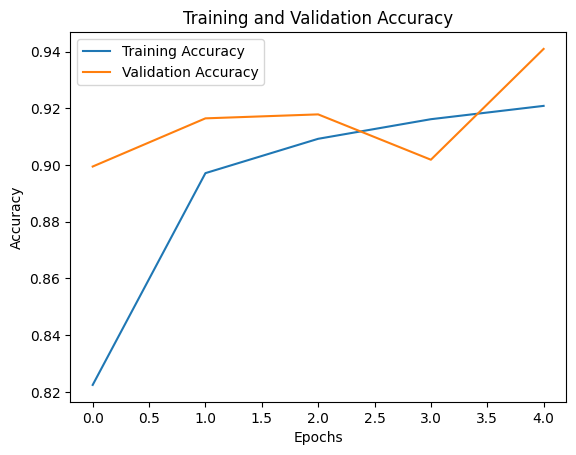

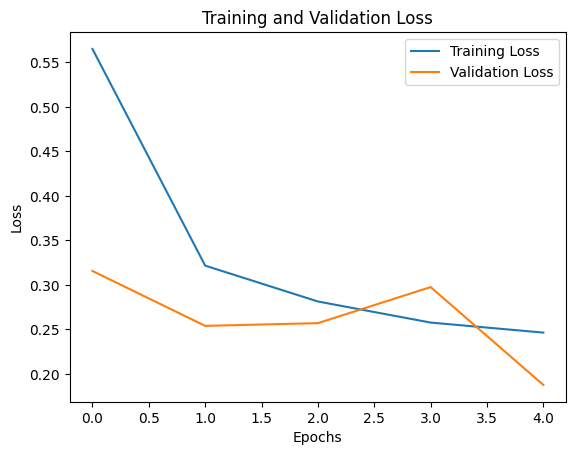

In [8]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
mnist_tr, mnist_te = mnist.load_data()
(x1, y1), (x2, y2) = mnist_tr, mnist_te
x1 = x1 / 255.0
x2 = x2 / 255.0
x1 = np.expand_dims(x1, -1)
x2 = np.expand_dims(x2, -1)
x1 = np.repeat(x1, 3, -1)
x2 = np.repeat(x2, 3, -1)
x1 = tf.image.resize(x1, (32,32))
x2 = tf.image.resize(x2, (32,32))
y1 = tf.keras.utils.to_categorical(y1, 10)
y2 = tf.keras.utils.to_categorical(y2, 10)
resnet32 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
resnet32.trainable = False
modelB = models.Sequential([
    resnet32,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
modelB.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
historyB = modelB.fit(x1, y1, epochs=5, validation_data=(x2, y2))
score = modelB.evaluate(x2, y2, verbose=2)
print(f'Test accuracy: {score[1]:.4f}')
plt.plot(historyB.history['accuracy'], label='Training Accuracy')
plt.plot(historyB.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
plt.plot(historyB.history['loss'], label='Training Loss')
plt.plot(historyB.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import random
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score
mnA, mnB = mnist.load_data()
(t1, l1), (t2, l2) = mnA, mnB
s = MinMaxScaler()
t1 = s.fit_transform(t1.reshape(-1,28*28)).reshape(-1,28,28,1)
t2 = s.transform(t2.reshape(-1,28*28)).reshape(-1,28,28,1)
l1 = tf.keras.utils.to_categorical(l1, 10)
l2 = tf.keras.utils.to_categorical(l2, 10)
def gen_episode(x, y, c=5, n=5, q=5):
    classes = random.sample(range(10), c)
    xsup, xqry, ysup, yqry = [], [], [], []
    for idx in classes:
        inds = np.where(y.argmax(axis=1) == idx)[0]
        subset = x[inds]
        if len(subset) >= n+q:
            s_inds = random.sample(range(len(subset)), n)
            q_inds = random.sample(list(set(range(len(subset))) - set(s_inds)), q)
            xsup.extend(subset[s_inds])
            xqry.extend(subset[q_inds])
            ysup.extend([idx]*n)
            yqry.extend([idx]*q)
    return np.array(xsup), np.array(xqry), np.array(ysup), np.array(yqry)
class ProtoNet(Model):
    def __init__(self):
        super().__init__()
        self.cn1 = Conv2D(32, 3, activation='relu')
        self.mp1 = MaxPooling2D(2)
        self.cn2 = Conv2D(64, 3, activation='relu')
        self.mp2 = MaxPooling2D(2)
        self.fl = Flatten()
        self.ds1 = Dense(128, activation='relu')
        self.ds2 = Dense(10, activation='softmax')
    def call(self, inp):
        x = self.cn1(inp)
        x = self.mp1(x)
        x = self.cn2(x)
        x = self.mp2(x)
        x = self.fl(x)
        x = self.ds1(x)
        return self.ds2(x)
def fit_episodes(model, x, y, cc=5, ns=5, nq=5, e=5):
    for epoch in range(e):
        sup, qry, ls, lq = gen_episode(x, y, cc, ns, nq)
        with tf.GradientTape() as tape:
            sup = tf.convert_to_tensor(sup, dtype=tf.float32)
            qry = tf.convert_to_tensor(qry, dtype=tf.float32)
            ls = tf.convert_to_tensor(ls, dtype=tf.int32)
            lq = tf.convert_to_tensor(lq, dtype=tf.int32)
            pred_sup = model(sup)
            pred_qry = model(qry)
            loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(lq, pred_qry))
        grad = tape.gradient(loss, model.trainable_variables)
        opt = tf.optimizers.Adam()
        opt.apply_gradients(zip(grad, model.trainable_variables))
        print(f'Epoch {epoch+1}/{e}, Loss: {loss.numpy()}')
class MatchNet(Model):
    def __init__(self):
        super().__init__()
        self.cn1 = Conv2D(32, 3, activation='relu')
        self.mp1 = MaxPooling2D(2)
        self.cn2 = Conv2D(64, 3, activation='relu')
        self.mp2 = MaxPooling2D(2)
        self.fl = Flatten()
        self.ds1 = Dense(128, activation='relu')
        self.ds2 = Dense(10, activation='softmax')
    def call(self, inp):
        x = self.cn1(inp)
        x = self.mp1(x)
        x = self.cn2(x)
        x = self.mp2(x)
        x = self.fl(x)
        x = self.ds1(x)
        return self.ds2(x)
def fit_oneshot(model, x, y, cc=5, ns=5, nq=1, e=5):
    for epoch in range(e):
        sup, qry, ls, lq = gen_episode(x, y, cc, ns, nq)
        with tf.GradientTape() as tape:
            sup = tf.convert_to_tensor(sup, dtype=tf.float32)
            qry = tf.convert_to_tensor(qry, dtype=tf.float32)
            ls = tf.convert_to_tensor(ls, dtype=tf.int32)
            lq = tf.convert_to_tensor(lq, dtype=tf.int32)
            pred_sup = model(sup)
            pred_qry = model(qry)
            loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(lq, pred_qry))
        grad = tape.gradient(loss, model.trainable_variables)
        opt = tf.optimizers.Adam()
        opt.apply_gradients(zip(grad, model.trainable_variables))
        print(f'Epoch {epoch+1}/{e}, Loss: {loss.numpy()}')
proto_mod = ProtoNet()
proto_mod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fit_episodes(proto_mod, t1, l1, e=5)
match_mod = MatchNet()
match_mod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fit_oneshot(match_mod, t1, l1, e=5)
test_pred_proto = proto_mod(t2)
test_pred_match = match_mod(t2)
lbls = np.argmax(l2, axis=1)
test_pred_proto = np.argmax(test_pred_proto, axis=1)
test_pred_match = np.argmax(test_pred_match, axis=1)
acc_proto = accuracy_score(lbls, test_pred_proto)
acc_match = accuracy_score(lbls, test_pred_match)
print(f'Prototypical Network Test Accuracy: {acc_proto * 100:.2f}%')
print(f'Matching Network Test Accuracy: {acc_match * 100:.2f}%')

Epoch 1/5, Loss: 2.288590669631958
Epoch 2/5, Loss: 2.3406052589416504
Epoch 3/5, Loss: 2.2523038387298584
Epoch 4/5, Loss: 2.410940647125244
Epoch 5/5, Loss: 2.142341375350952
Epoch 1/5, Loss: 2.213562250137329
Epoch 2/5, Loss: 2.369485855102539
Epoch 3/5, Loss: 2.2563610076904297
Epoch 4/5, Loss: 2.119117259979248
Epoch 5/5, Loss: 2.2275781631469727
Prototypical Network Test Accuracy: 19.30%
Matching Network Test Accuracy: 16.80%
